<a href="https://colab.research.google.com/github/Soulfex/Anomaly_detection/blob/main/Distancia_ciudades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para todas las capitales de México, y todas las ciudades con más de 100,000 habitantes:

1. Obtener sus coordenadas (latitud, longitud), su temperatura esperada en Febrero, Junio y Diciembre. Para los mismos meses obtener las temperaturas más bajas, así como las temperatuas más altas.

$$ XALAPA = [19° 31' 52'' N, 96° 54' 57 0, 16.5, 21.1, 16.4, 0.0, 9.0, 0.9, 33.4, 36.0, 32.5] $$

2. Para cada ciudad, encontrar la distancia en el espacio definido por los atributos de latitud y longitud a la ciudad (en el conjuto de datos) más cercana con temperatura esperada en (febrero, junio, diciembre) menor a 20.0

3. Para cada ciudad, encontrar la distancia en el espacio definido por los atributos de latitud y longitud a la ciudad (en el conjuto de datos) más cercana con temperatura esperada en (febrero, junio, diciembre) mayor a 30.0

4. Para cada ciudad, encontrar la distancia en el espacio definido por los atributos de latitud y longitud a la ciudad (en el conjuto de datos) más cercana con temperatura esperada en (febrero, junio, diciembre) menor a 5.0

In [ ]:
# Importamos la librerias que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = {'Capitales' : ['Ciudad_de_México', 'Puebla_de_Zaragoza', 'Guadalajara', 'Monterrey', 'Chihuahua', 'Mérida', 
                       'Saltillo', 'Aguascalientes', 'Hermosillo', 'Mexicali', 'San Luis Potosí', 'Culiacán Rosales', 
                       'Santiago de Querétaro', 'Morelia', 'Victoria de Durango', 'Tuxtla Gutiérrez', 'Xalapa', 'Tepic', 
                       'Cuernavaca', 'Villahermosa', 'Ciudad Victoria', 'Pachuca de Soto', 'Oaxaca de Juárez', 'La Paz', 
                       'Campeche', 'Chilpancingo', 'Toluca de Lerdo', 'Chetumal', 'Colima', 'Zacatecas', 'Guanajuato' ],
        'Latitud': [19.42847, 19.0413, 20.6736, 25.6714, 28.63528, 20.97537, 25.42321, 21.88234, 29.1026, 
                    32.62781, 22.14982, 24.79032, 20.58806, 19.70078, 24.02032, 16.75973, 19.53124, 21.50951, 18.9261, 17.98689,
                    23.74174, 20.11697, 17.0669, 24.14437, 19.84386, 17.5506, 19.28786, 18.51413, 19.24997, 22.76843, 21.01858], 
        
        'Longitud': [-99.12766, -98.2062, -103.344, -100.309, -106.08889, -89.61696, -101.0053, -102.28259, -110.97732,
                     -115.45446, -100.97916, -107.38782, -100.38806, -101.18443, -104.65756, -93.11308, -96.91589, -104.89569,
                     -99.23075, -92.93028, -99.14599, -98.73329, -96.7203, -110.3005, -90.52554, -99.50578, -99.65324, -88.30381, -103.72714,
                     -102.58141, -101.2591],
        
        'Temperatura más alta febrero' : [21.7, 21.1, 25.9, 21.8, 22.0, 32.0, 23.0, 25.0, 27.0, 23.0, 25.0, 29.0, 24.0, 27.0, 24.0, 32.0, 23.0, 28.0, 29.0, 30.0, 27.0, 21.0, 29.0, 27.0, 32.0, 30.0, 21.0, 30.0, 33.0, 17.0, 25.0],
        'Temperatura más alta Junio' : [21.8,  21.8, 30.1, 31.3, 35.0, 36.0, 30.0, 30.0, 41.0, 40.0, 29.0, 36.0, 28.0, 29.0, 32.0, 33.0, 27.0, 31.0, 29.0, 34.0, 36.0, 22.0, 29.0, 38.0, 35.0, 30.0, 22.0, 33.0, 34.0, 22.0, 30.0 ],
        'Temperatura más alta  Diciembre' : [19.5, 19.5, 23.5, 19.5, 19.0, 31.0, 22.0, 23.0, 25.0, 21.0, 23.0, 29.0, 23.0, 25.0, 23.0, 30.0, 22.0, 27.0, 26.0, 28.0, 24.0, 20.0, 27.0, 26.0, 30.0, 29.0, 20.0, 30.0, 30.0, 16.0, 27.0  ], 
        
         'Temperatura más baja febrero' : [8.5,8.5,10, 10.4, 4, 18.0, 6.0, 5.0, 10.0, 7.0, 5.0, 12.0, 7.0, 7.0, 4.0, 17.0, 11.0, 8.0, 12.0, 21.0, 12.0, 7.0, 10.0, 13.0, 18.0, 13.0, 0.0, 20.0, 16.0, 7.0, 8.0  ],
        'Temperatura más baja Junio' : [12.3, 12.3, 17.9, 20.4, 19.0, 23.0, 15.0, 14.0, 24.0, 21.0, 12.0, 24.0, 14.0, 15.0, 15.0, 21.0, 16.0, 17.0, 15.0, 25.0, 22.0, 12.0, 15.0, 19.0, 23.0, 18.0, 8.0, 25.0, 21.0, 12.0, 15.0  ],
        'Temperatura más baja  Diciembre' : [7.6, 7.6, 9.9, 9.5, 3.0, 18.0, 5.0, 4.0, 9.0, 5.0, 3.0, 13.0, 6.0, 7.0, 3.0, 17.0, 11.0, 9.0, 12.0, 21.0, 11.0, 6.0, 8.0, 14.0, 19.0, 13.0, 0.0, 19.0, 18.0, 7.0, 7.0  ] 
        
        
        
       }

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,Capitales,Latitud,Longitud,Temperatura más alta febrero,Temperatura más alta Junio,Temperatura más alta Diciembre,Temperatura más baja febrero,Temperatura más baja Junio,Temperatura más baja Diciembre
0,Ciudad_de_México,19.42847,-99.12766,21.7,21.8,19.5,8.5,12.3,7.6
1,Puebla_de_Zaragoza,19.04130,-98.20620,21.1,21.8,19.5,8.5,12.3,7.6
2,Guadalajara,20.67360,-103.34400,25.9,30.1,23.5,10.0,17.9,9.9
3,Monterrey,25.67140,-100.30900,21.8,31.3,19.5,10.4,20.4,9.5
4,Chihuahua,28.63528,-106.08889,22.0,35.0,19.0,4.0,19.0,3.0
5,Mérida,20.97537,-89.61696,32.0,36.0,31.0,18.0,23.0,18.0
6,Saltillo,25.42321,-101.00530,23.0,30.0,22.0,6.0,15.0,5.0
7,Aguascalientes,21.88234,-102.28259,25.0,30.0,23.0,5.0,14.0,4.0
8,Hermosillo,29.10260,-110.97732,27.0,41.0,25.0,10.0,24.0,9.0
9,Mexicali,32.62781,-115.45446,23.0,40.0,21.0,7.0,21.0,5.0


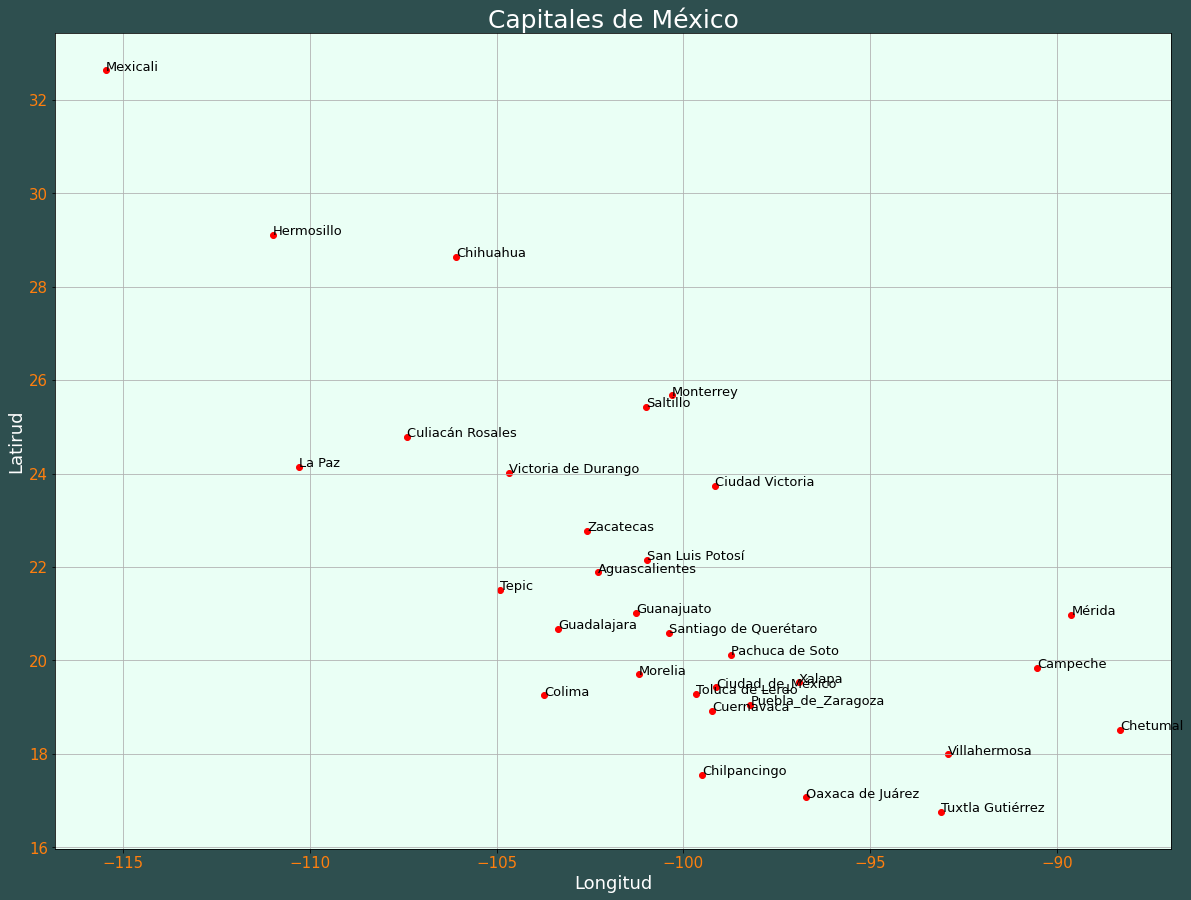

In [ ]:
# Graficamos Longitud, latitud
fig, ax = plt.subplots(facecolor=(.18, .31, .31), figsize = (20, 15))
ax.scatter(df['Longitud'], df['Latitud'], color = "r")
ax.set_facecolor('#eafff5')
ax.tick_params(axis='both', which='major', labelsize=15, labelcolor='tab:orange')
ax.set_xlabel('Longitud', fontsize = 18, color = "w")
ax.set_ylabel('Latirud', fontsize = 18, color = "w")
ax.set_title('Capitales de México', fontsize = 25, color = "w")
ax.grid(True)


for i, txt in enumerate(df['Capitales']):
    ax.annotate(txt, (df['Longitud'][i], df['Latitud'][i]), fontsize = 13 )

In [ ]:
# Temperatura esperada (Febrero, Junio, Diciembre)
temperaturaPromF = df[['Temperatura más alta febrero', 'Temperatura más baja febrero']]
temperaturaPromJ = df[['Temperatura más alta Junio', 'Temperatura más baja Junio']]
temperaturaPromD = df[['Temperatura más alta  Diciembre', 'Temperatura más baja  Diciembre']]

temperaturaPromF = temperaturaPromF.mean(axis = 1)
temperaturaPromJ = temperaturaPromJ.mean(axis = 1)
temperaturaPromD = temperaturaPromD.mean(axis = 1)

tA = df[['Temperatura más alta febrero','Temperatura más alta Junio', 'Temperatura más alta  Diciembre']]
tB = df[['Temperatura más baja febrero','Temperatura más baja Junio', 'Temperatura más baja  Diciembre']]

meanTA = tA.mean(axis = 1)
meanTB = tB.mean(axis = 1)
   
    
        

In [ ]:
df['Temperatura alta promedio'] =  meanTA 
df['Temperatura baja promedio'] = meanTB

df['Temperatura esperada Febrero'] = temperaturaPromF
df['Temperatura esperada Junio'] = temperaturaPromJ
df['Temperatura esperada Diciembre'] = temperaturaPromD

In [ ]:
temperaturaEsperada = df[['Temperatura esperada Febrero', 'Temperatura esperada Junio', 'Temperatura esperada Diciembre' ]]
temperaturaEsperada = temperaturaEsperada.mean(axis = 1)

df['Temperatura esperada'] = temperaturaEsperada

In [ ]:
df

,Capitales,Latitud,Longitud,Temperatura más alta febrero,Temperatura más alta Junio,Temperatura más alta Diciembre,Temperatura más baja febrero,Temperatura más baja Junio,Temperatura más baja Diciembre,Temperatura alta promedio,Temperatura baja promedio,Temperatura esperada Febrero,Temperatura esperada Junio,Temperatura esperada Diciembre,Temperatura esperada
0,Ciudad_de_México,19.42847,-99.12766,21.7,21.8,19.5,8.5,12.3,7.6,21.000000,9.466667,15.10,17.05,13.55,15.233333
1,Puebla_de_Zaragoza,19.04130,-98.20620,21.1,21.8,19.5,8.5,12.3,7.6,20.800000,9.466667,14.80,17.05,13.55,15.133333
2,Guadalajara,20.67360,-103.34400,25.9,30.1,23.5,10.0,17.9,9.9,26.500000,12.600000,17.95,24.00,16.70,19.550000
3,Monterrey,25.67140,-100.30900,21.8,31.3,19.5,10.4,20.4,9.5,24.200000,13.433333,16.10,25.85,14.50,18.816667
4,Chihuahua,28.63528,-106.08889,22.0,35.0,19.0,4.0,19.0,3.0,25.333333,8.666667,13.00,27.00,11.00,17.000000
5,Mérida,20.97537,-89.61696,32.0,36.0,31.0,18.0,23.0,18.0,33.000000,19.666667,25.00,29.50,24.50,26.333333
6,Saltillo,25.42321,-101.00530,23.0,30.0,22.0,6.0,15.0,5.0,25.000000,8.666667,14.50,22.50,13.50,16.833333
7,Aguascalientes,21.88234,-102.28259,25.0,30.0,23.0,5.0,14.0,4.0,26.000000,7.666667,15.00,22.00,13.50,16.833333
8,Hermosillo,29.10260,-110.97732,27.0,41.0,25.0,10.0,24.0,9.0,31.000000,14.333333,18.50,32.50,17.00,22.666667
9,Mexicali,32.62781,-115.45446,23.0,40.0,21.0,7.0,21.0,5.0,28.000000,11.000000,15.00,30.50,13.00,19.500000


### Para cada ciudad, encontrar la distancia en el espacio definido por los atributos de latitud y longitud a la ciudad (en el conjuto de datos) más cercana con temperatura esperada en (febrero, junio, diciembre) menor a 20.0

In [ ]:
# Vemos que ciudades entran es ese conjunto
df.loc[df['Temperatura esperada'] < 20]

,Capitales,Latitud,Longitud,Temperatura más alta febrero,Temperatura más alta Junio,Temperatura más alta Diciembre,Temperatura más baja febrero,Temperatura más baja Junio,Temperatura más baja Diciembre,Temperatura alta promedio,Temperatura baja promedio,Temperatura esperada Febrero,Temperatura esperada Junio,Temperatura esperada Diciembre,Temperatura esperada
0,Ciudad_de_México,19.42847,-99.12766,21.7,21.8,19.5,8.5,12.3,7.6,21.000000,9.466667,15.10,17.05,13.55,15.233333
1,Puebla_de_Zaragoza,19.04130,-98.20620,21.1,21.8,19.5,8.5,12.3,7.6,20.800000,9.466667,14.80,17.05,13.55,15.133333
2,Guadalajara,20.67360,-103.34400,25.9,30.1,23.5,10.0,17.9,9.9,26.500000,12.600000,17.95,24.00,16.70,19.550000
3,Monterrey,25.67140,-100.30900,21.8,31.3,19.5,10.4,20.4,9.5,24.200000,13.433333,16.10,25.85,14.50,18.816667
4,Chihuahua,28.63528,-106.08889,22.0,35.0,19.0,4.0,19.0,3.0,25.333333,8.666667,13.00,27.00,11.00,17.000000
6,Saltillo,25.42321,-101.00530,23.0,30.0,22.0,6.0,15.0,5.0,25.000000,8.666667,14.50,22.50,13.50,16.833333
7,Aguascalientes,21.88234,-102.28259,25.0,30.0,23.0,5.0,14.0,4.0,26.000000,7.666667,15.00,22.00,13.50,16.833333
9,Mexicali,32.62781,-115.45446,23.0,40.0,21.0,7.0,21.0,5.0,28.000000,11.000000,15.00,30.50,13.00,19.500000
10,San Luis Potosí,22.14982,-100.97916,25.0,29.0,23.0,5.0,12.0,3.0,25.666667,6.666667,15.00,20.50,13.00,16.166667
12,Santiago de Querétaro,20.58806,-100.38806,24.0,28.0,23.0,7.0,14.0,6.0,25.000000,9.000000,15.50,21.00,14.50,17.000000


In [ ]:
min(df.loc[df['Temperatura esperada'] < 20]['Temperatura esperada'])

11.833333333333334

In [ ]:
min(df.loc[df['Capitales'] == 'Oaxaca de Juárez']['Temperatura esperada'])

19.666666666666668

In [ ]:
df['Capitales']

0          Ciudad_de_México
1        Puebla_de_Zaragoza
2               Guadalajara
3                 Monterrey
4                 Chihuahua
5                    Mérida
6                  Saltillo
7            Aguascalientes
8                Hermosillo
9                  Mexicali
10          San Luis Potosí
11         Culiacán Rosales
12    Santiago de Querétaro
13                  Morelia
14      Victoria de Durango
15         Tuxtla Gutiérrez
16                   Xalapa
17                    Tepic
18               Cuernavaca
19             Villahermosa
20          Ciudad Victoria
21          Pachuca de Soto
22         Oaxaca de Juárez
23                   La Paz
24                 Campeche
25             Chilpancingo
26          Toluca de Lerdo
27                 Chetumal
28                   Colima
29                Zacatecas
30               Guanajuato
Name: Capitales, dtype: object

In [ ]:
# Definimos la distancia
import math
 
# Python 3 program for the
# haversine formula
def haversine(lat1, lon1, lat2, lon2):
     
    # distance between latitudes
    # and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c
def euclideanDistance(x1, y1, x2, y2):
    distancia = math.sqrt((x2-x1)**2+(y2-y1)**2)
    return distancia

In [ ]:
coordenadas = []
for index, row in df.iterrows():
    
    coordenadas.append([row['Latitud'], row['Longitud']])

In [ ]:
coordenadas

[[19.42847, -99.12766],
 [19.0413, -98.2062],
 [20.6736, -103.344],
 [25.6714, -100.309],
 [28.63528, -106.08889],
 [20.97537, -89.61696],
 [25.42321, -101.0053],
 [21.88234, -102.28259],
 [29.1026, -110.97732],
 [32.62781, -115.45446],
 [22.14982, -100.97916],
 [24.79032, -107.38782],
 [20.58806, -100.38806],
 [19.70078, -101.18443],
 [24.02032, -104.65756],
 [16.75973, -93.11308],
 [19.53124, -96.91589],
 [21.50951, -104.89569],
 [18.9261, -99.23075],
 [17.98689, -92.93028],
 [23.74174, -99.14599],
 [20.11697, -98.73329],
 [17.0669, -96.7203],
 [24.14437, -110.3005],
 [19.84386, -90.52554],
 [17.5506, -99.50578],
 [19.28786, -99.65324],
 [18.51413, -88.30381],
 [19.24997, -103.72714],
 [22.76843, -102.58141],
 [21.01858, -101.2591]]

In [ ]:
distancias = []
for i in coordenadas:
    
    if (i != [17.0669, -96.7203]):
        distancias.append(haversine(df.loc[df['Temperatura esperada'] == 19.666666666666668]['Longitud'] , df.loc[df['Temperatura esperada'] == 19.666666666666668]['Latitud'], i[1], i[0]))

In [ ]:
distancias

[270.0670249074859,
 167.64322108793195,
 739.4705594986539,
 422.3566218171806,
 1067.214300404354,
 789.7616217337389,
 496.2820711365151,
 624.2475078920108,
 1608.9594970784174,
 2119.4086162456806,
 481.02394439491997,
 1197.0435762498312,
 411.7844303496082,
 498.3475343200163,
 892.5753064594571,
 401.1138112216565,
 39.126794475685365,
 913.1023152419772,
 280.582966982717,
 421.5053176127716,
 288.07923118039685,
 228.35388611666318,
 1518.4203189042232,
 688.9002977819847,
 309.8215162827818,
 327.95832324618357,
 935.822892228162,
 780.1769525636347,
 659.5464582412802,
 509.0461117353789]

Text(0, 0.5, 'Número de ciudades')

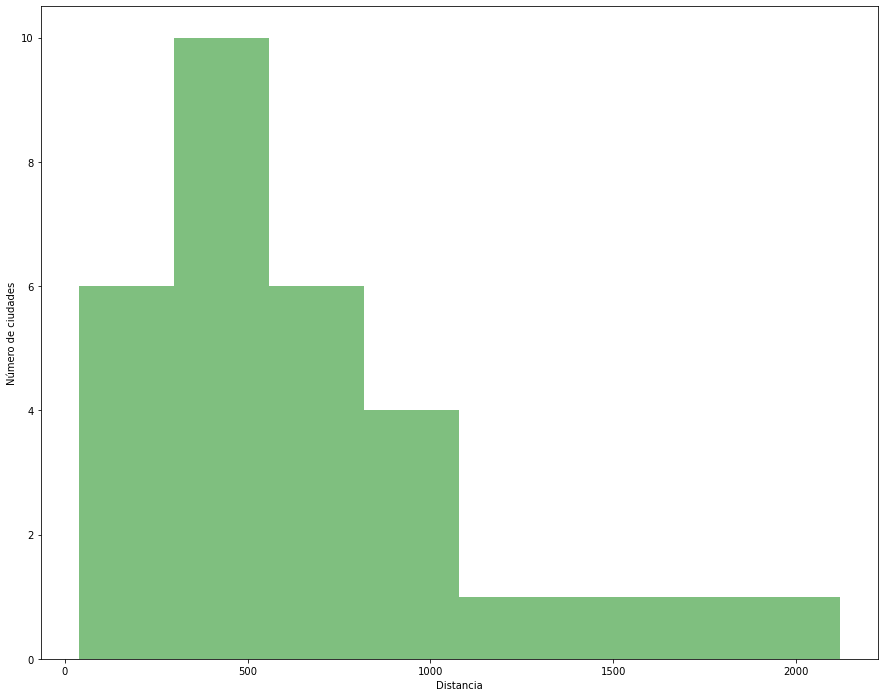

In [ ]:
# Distancias a Oaxaca
plt.figure(figsize=(15,12))
plt.hist(distancias, 8,  histtype ='bar', color='g', alpha=0.5)
plt.xlabel("Distancia")
plt.ylabel("Número de ciudades")

### Para cada ciudad, encontrar la distancia en el espacio definido por los atributos de latitud y longitud a la ciudad (en el conjuto de datos) más cercana con temperatura esperada en (febrero, junio, diciembre) mayor a 30.0

In [ ]:
df.loc[df['Temperatura esperada'] > 26]

,Capitales,Latitud,Longitud,Temperatura más alta febrero,Temperatura más alta Junio,Temperatura más alta Diciembre,Temperatura más baja febrero,Temperatura más baja Junio,Temperatura más baja Diciembre,Temperatura alta promedio,Temperatura baja promedio,Temperatura esperada Febrero,Temperatura esperada Junio,Temperatura esperada Diciembre,Temperatura esperada
5,Mérida,20.97537,-89.61696,32.0,36.0,31.0,18.0,23.0,18.0,33.000000,19.666667,25.0,29.5,24.5,26.333333
19,Villahermosa,17.98689,-92.93028,30.0,34.0,28.0,21.0,25.0,21.0,30.666667,22.333333,25.5,29.5,24.5,26.500000
24,Campeche,19.84386,-90.52554,32.0,35.0,30.0,18.0,23.0,19.0,32.333333,20.000000,25.0,29.0,24.5,26.166667
27,Chetumal,18.51413,-88.30381,30.0,33.0,30.0,20.0,25.0,19.0,31.000000,21.333333,25.0,29.0,24.5,26.166667


In [ ]:
# Distancia a villahermosa
distancias2 = []
for i in coordenadas:
    distancias2.append(haversine(df.loc[df['Temperatura esperada'] == 26.500000]['Longitud'] , df.loc[df['Temperatura esperada'] == 26.500000]['Latitud'], i[1], i[0]))

Text(0, 0.5, 'Número de ciudades')

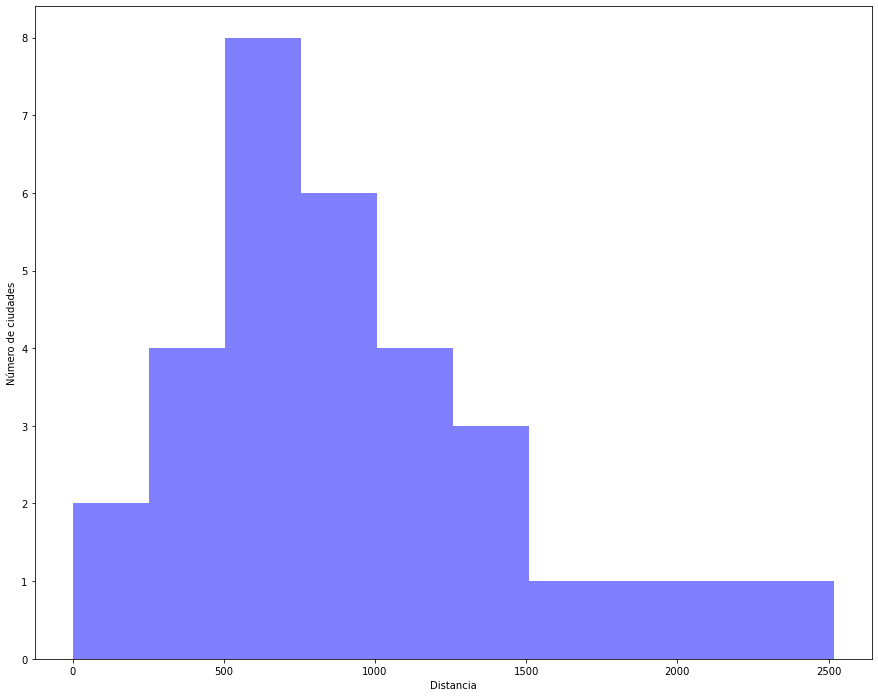

In [ ]:
plt.figure(figsize=(15,12))
plt.hist(distancias2, 10,  histtype ='bar', color='b', alpha=0.5)
plt.xlabel("Distancia")
plt.ylabel("Número de ciudades")

In [ ]:
df.loc[df['Temperatura esperada'] < 12]['Temperatura esperada']

26    11.833333
Name: Temperatura esperada, dtype: float64

### Para cada ciudad, encontrar la distancia en el espacio definido por los atributos de latitud y longitud a la ciudad (en el conjuto de datos) más cercana con temperatura esperada en (febrero, junio, diciembre) menor a 5.0

In [ ]:
# Distancia a Toluca
distancias3 = []
for i in coordenadas:
    distancias3.append(haversine(df.loc[df['Temperatura esperada'] < 12]['Longitud'] , df.loc[df['Temperatura esperada'] < 12]['Latitud'], i[1], i[0]))

Text(0, 0.5, 'Número de ciudades')

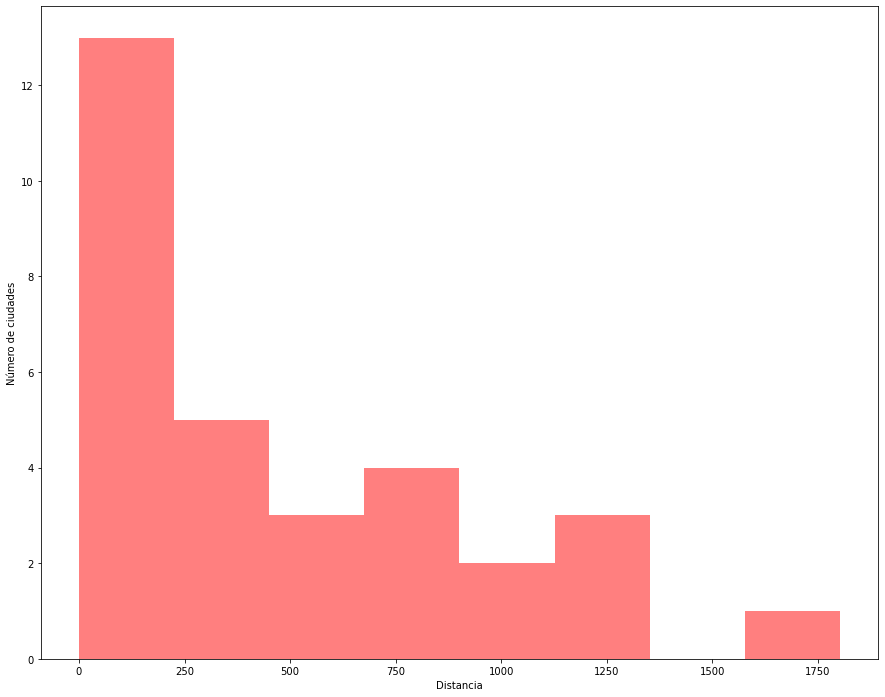

In [ ]:
plt.figure(figsize=(15,12))
plt.hist(distancias3, 8,  histtype ='bar', color='r', alpha=0.5)
plt.xlabel("Distancia")
plt.ylabel("Número de ciudades")